In [49]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

In [33]:
models = ['resnet', 'densenet', 'b-resnet', 'b-densenet', 'msdnet']

pc_runs = {
    'resnet': pd.read_csv('jetson-resnet_inference_test.csv', index_col=0),
    'densenet': pd.read_csv('jetson-densenet_inference_test.csv', index_col=0),
    'b-resnet': pd.read_csv('jetson-b-resnet1_inference_test.csv', index_col=0),
    'b-densenet': pd.read_csv('jetson-b-densenet1_inference_test.csv', index_col=0),
    'msdnet' : pd.read_csv('jetson-msdnet_inference_test.csv', index_col=0)
}

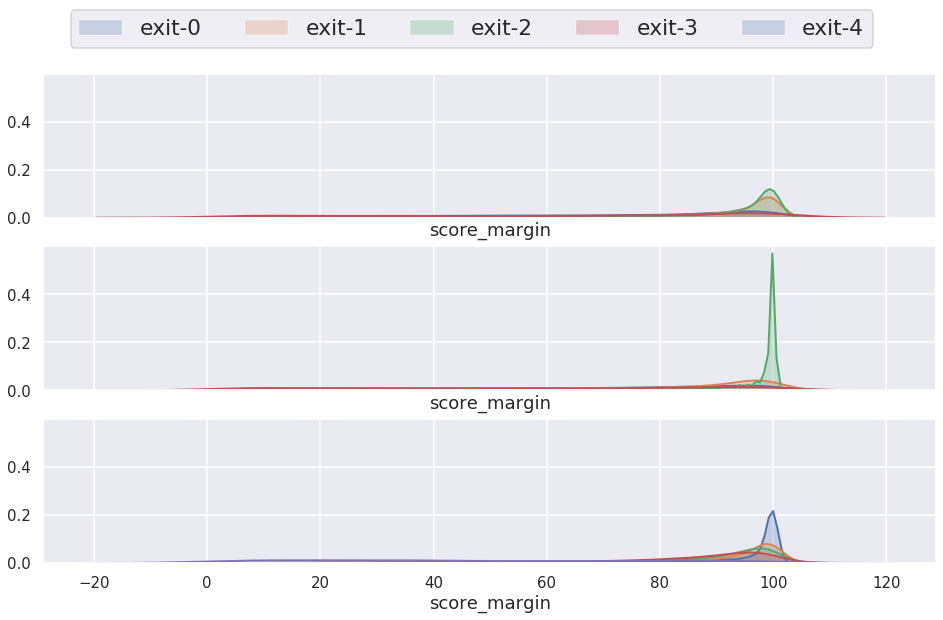

In [50]:
fig, axes = plt.subplots(3,1, figsize=(16,9), sharex=True, sharey=True)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=False, kde=True, bins=100)

for score in pc_runs['b-resnet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[1], **kwargs)

for score in pc_runs['b-densenet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[0], **kwargs)

for score in pc_runs['msdnet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[2], **kwargs)
fig.legend(['exit-{}'.format(x) for x in range(5)], loc='upper center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=False, ncol=5, fontsize='large')


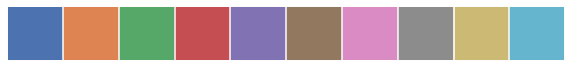

In [35]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [36]:
current_palette.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

In [37]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cols=["Mean Accuracy", "Mean Time", "Std. Accuracy", "Std. Time"]
pc_runs_stats = {model: pd.DataFrame(
    columns=cols) for model in models[2:]}
pc_runs_stats

{'b-resnet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: [], 'b-densenet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: [], 'msdnet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: []}

In [38]:
for model in pc_runs_stats:
    for treshold in pc_runs[model].groupby(['threshold']):
        mean = treshold[1].mean()
        std = treshold[1].std()
        pc_runs_stats[model] = pc_runs_stats[model].append(dict(zip(cols, [mean.correct, mean.time, std.correct, std.time])),ignore_index=True)
    pc_runs_stats[model] = pc_runs_stats[model].set_index(pd.Index(x))

In [39]:
pc_runs_stats

{'b-resnet':      Mean Accuracy  Mean Time  Std. Accuracy  Std. Time
 0.1         0.6466   0.026170       0.478073   0.039264
 0.2         0.7354   0.030936       0.441164   0.017477
 0.3         0.7880   0.034880       0.408766   0.019518
 0.4         0.8224   0.038417       0.382214   0.020669
 0.5         0.8492   0.041324       0.357890   0.021237
 0.6         0.8660   0.044038       0.340686   0.021450
 0.7         0.8754   0.046887       0.330298   0.021431
 0.8         0.8844   0.049706       0.319777   0.021027
 0.9         0.8906   0.053805       0.312172   0.019983,
 'b-densenet':      Mean Accuracy  Mean Time  Std. Accuracy  Std. Time
 0.1         0.6560   0.032074       0.475089   0.034646
 0.2         0.7248   0.034803       0.446660   0.012923
 0.3         0.7652   0.038118       0.423916   0.015403
 0.4         0.7966   0.040990       0.402568   0.017004
 0.5         0.8236   0.043637       0.381198   0.018183
 0.6         0.8410   0.046333       0.365713   0.019040
 0.7

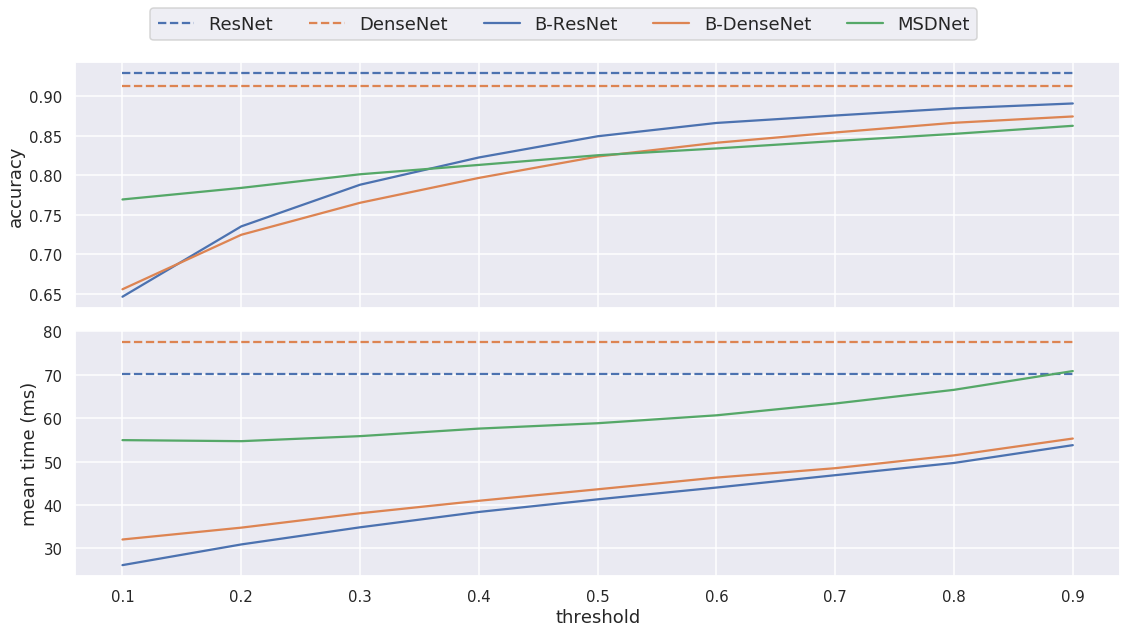

In [51]:
fig, axes = plt.subplots(2,1, sharex=True)
sns.lineplot(x=x, y=pc_runs['resnet'].correct.mean()*np.ones(9), ax=axes[0], color=current_palette[0])
sns.lineplot(x=x, y=pc_runs['resnet'].time.mean()*np.ones(9)*1000, ax=axes[1], color=current_palette[0])

sns.lineplot(x=x, y=pc_runs['densenet'].correct.mean()*np.ones(9), ax=axes[0],  color=current_palette[1])
sns.lineplot(x=x, y=pc_runs['densenet'].time.mean()*np.ones(9)*1000, ax=axes[1],  color=current_palette[1])

sns.lineplot(data=pc_runs_stats['b-resnet']['Mean Accuracy'], ax=axes[0], color=current_palette[0])
sns.lineplot(data=pc_runs_stats['b-resnet']['Mean Time']*1000, ax=axes[1], color=current_palette[0])

sns.lineplot(data=pc_runs_stats['b-densenet']['Mean Accuracy'], ax=axes[0], color=current_palette[1])
sns.lineplot(data=pc_runs_stats['b-densenet']['Mean Time']*1000, ax=axes[1], color=current_palette[1])

sns.lineplot(data=pc_runs_stats['msdnet']['Mean Accuracy'], ax=axes[0], color=current_palette[2])
sns.lineplot(data=pc_runs_stats['msdnet']['Mean Time']*1000, ax=axes[1], color=current_palette[2])

axes[0].set_ylabel('accuracy')
axes[1].set_ylabel('mean time (ms)')
plt.xlabel('threshold')



axes[0].lines[0].set_linestyle("--")

axes[1].lines[0].set_linestyle("--")

axes[0].lines[1].set_linestyle("--")

axes[1].lines[1].set_linestyle("--")


fig.legend([ 'ResNet', 'DenseNet', 'B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=5, loc="upper center", fontsize='medium')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('jetson_inference.png')

In [52]:
time_thresholds = np.arange(0.01, 0.08, 0.003)
model_time_threshold = {
    x : {t : {} for t in time_thresholds*1000} for x in models[2:]
}
for threshold in time_thresholds:
    for model in models[2:]:
        result = pc_runs_stats[model].loc[pc_runs_stats[model]['Mean Time'] < threshold].max()
        if not np.isnan(result).any():
            model_time_threshold[model][threshold*1000]['accuracy'] = result['Mean Accuracy']
            model_time_threshold[model][threshold*1000]['time'] = result['Mean Time']*1000
        else:
            model_time_threshold[model][threshold*1000] = None

In [53]:
bresnet = pd.DataFrame(model_time_threshold['b-resnet']).T

In [54]:
bdensenet = pd.DataFrame(model_time_threshold['b-densenet']).T

In [55]:
msdnet = pd.DataFrame(model_time_threshold['msdnet']).T

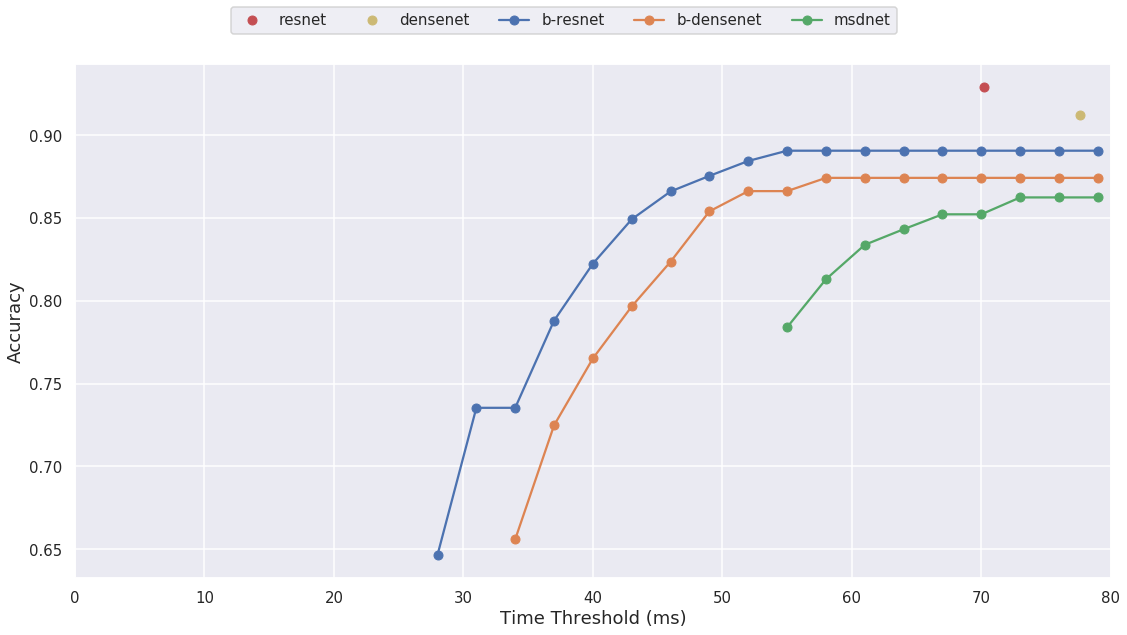

In [56]:
fig, axes = plt.subplots(1,1)
axes.plot(pc_runs['resnet'].time.mean()*1000,pc_runs['resnet'].correct.mean(),'ro') 
axes.plot(pc_runs['densenet'].time.mean()*1000,pc_runs['densenet'].correct.mean(),'yo')                  
axes.plot(bresnet['accuracy'], marker='o')
axes.plot(bdensenet['accuracy'], marker='o')
axes.plot(msdnet['accuracy'], marker='o')

fig.legend(models, ncol=5, loc="upper center", fontsize='small')
axes.set(xlabel='Time Threshold (ms)', ylabel='Accuracy')
axes.set_xlim([0,80])
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('time_threshold_jetson.png')

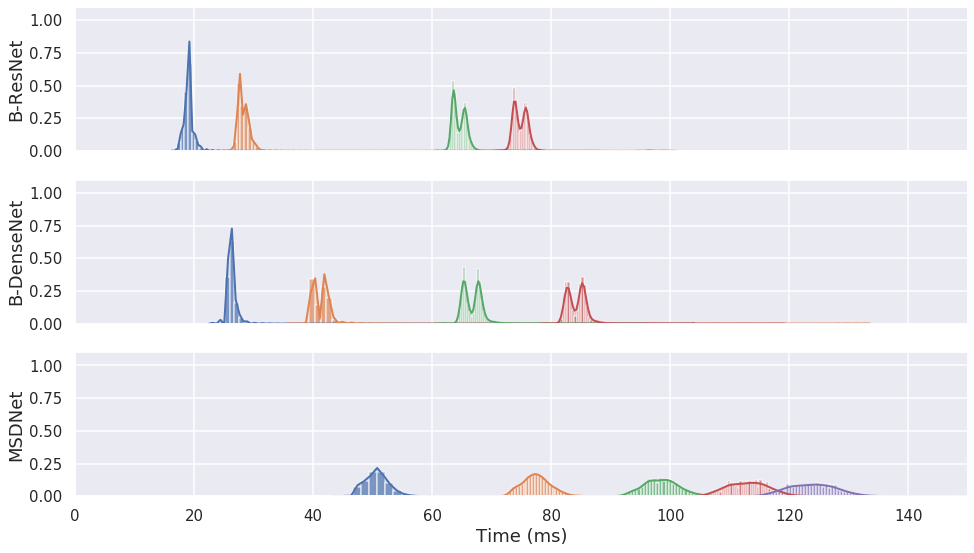

In [62]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
for exit in range(4):
    sns.distplot(pc_runs['b-resnet'].loc[pc_runs['b-resnet'].exit==exit].time[1:]*1000,ax=axes[0], **kwargs)
    sns.distplot(pc_runs['b-densenet'].loc[pc_runs['b-densenet'].exit==exit].time[1:]*1000,ax=axes[1], **kwargs)
for exit in range(5):
    sns.distplot(pc_runs['msdnet'].loc[pc_runs['msdnet'].exit==exit].time[1:]*1000,ax=axes[2], **kwargs)

labels = ['B-ResNet', 'B-DenseNet', 'MSDNet']
for ax, label in zip(axes.flat, labels):
    ax.set(xlabel='Time (ms)', ylabel=label)
    ax.label_outer()
    ax.set_xlim([0,150])
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.25,0.5,0.75,1])
plt.savefig('jetson_inference_time_distribution.png')

In [39]:
ee_res.exit= ee_res.exit.astype('int')
d = {    'ResNet': ee_res.groupby(['threshold', 'exit', 'correct']).size(),
         'DenseNet': ee_dense.groupby(['threshold', 'exit', 'correct']).size(),
         'MSDNet': ee_msd.groupby(['threshold', 'exit', 'correct']).size()   }
df = pd.DataFrame(d)

df = df / 5000
df

ResNet  DenseNet  MSDNet
threshold exit correct                          
0.1       0.0  0.0      0.2498    0.2608  0.2040
               1.0      0.4096    0.4782  0.7368
          1.0  0.0      0.0816    0.0672  0.0228
               1.0      0.1688    0.1578  0.0282
          2.0  0.0      0.0194    0.0138  0.0034
...                        ...       ...     ...
0.9       2.0  1.0      0.4640    0.2234  0.0686
          3.0  0.0      0.0788    0.0876  0.0106
               1.0      0.0992    0.1376  0.0256
          4.0  0.0         NaN       NaN  0.0724
               1.0         NaN       NaN  0.0522

[88 rows x 3 columns]

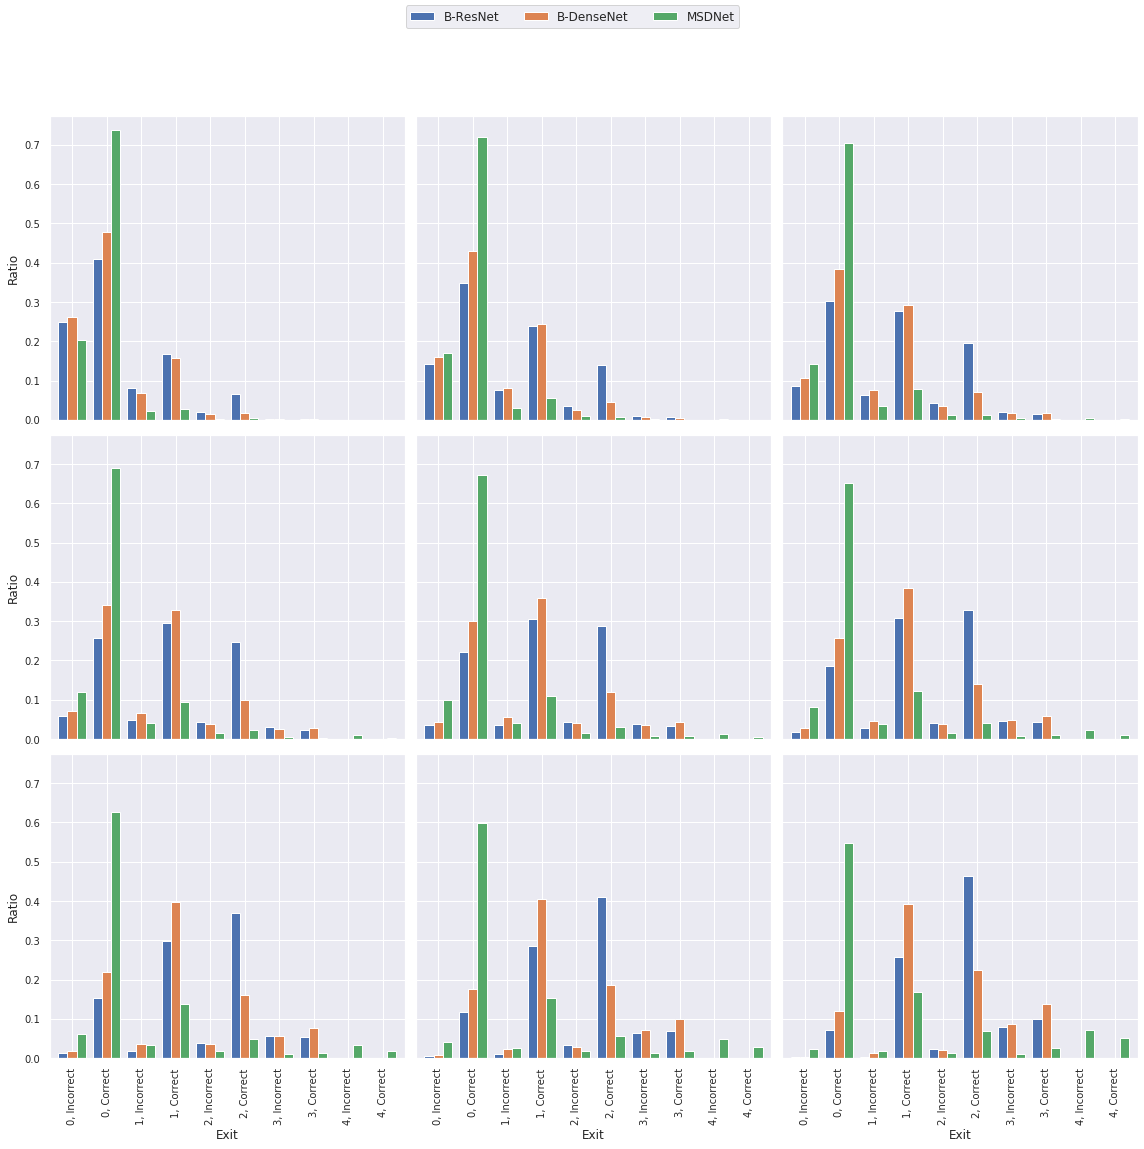

In [40]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(16,16))
for i, (ax, data) in enumerate(zip(axes.flat, df.groupby('threshold'))):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('inference_threshold_test.PNG')

In [ ]:
mean

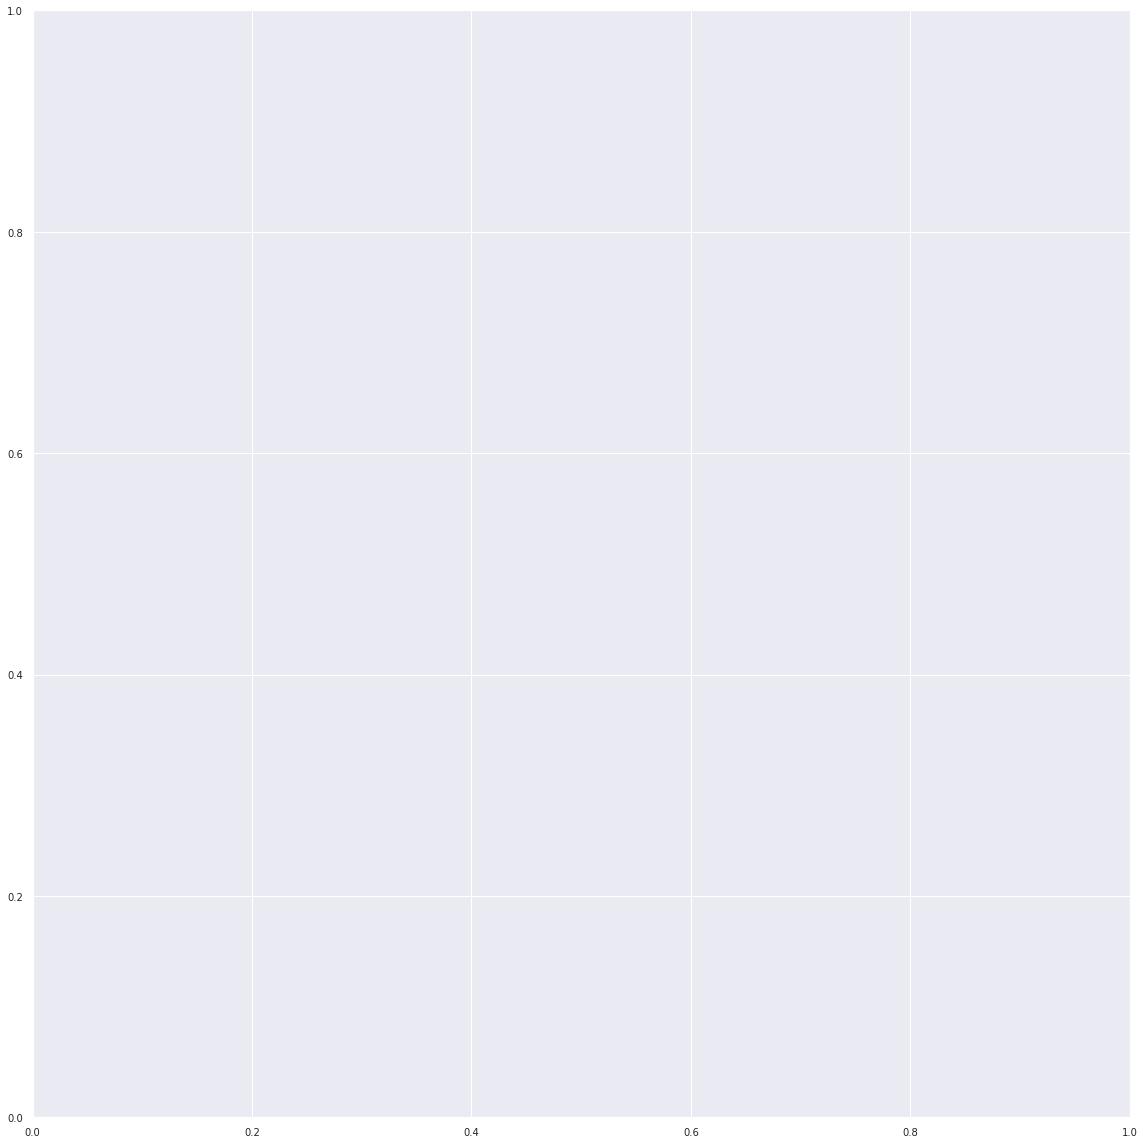

In [44]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,16))
for i, (data) in enumerate(df.groupby('threshold')):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    #ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
#fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
#fig.subplots_adjust(top=0.90)
#plt.savefig('inference_threshold_test.PNG')

In [ ]:
np.arange(1,6)*0.5

In [ ]:
list(np.array([['Correct {}'.format(exit), 'Incorrect {}'.format(exit)] for exit in np.arange(5)]).flatten())

In [ ]:
df['ResNet']

In [ ]:
models = ['b-densenet', 'b-resnet', 'msdnet']
df = pd.DataFrame({
        'model':models,
        'exit-0':np.random.randn(3),
        'score2':np.random.randn(3),

                   })

df